In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Effect of Outliers

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

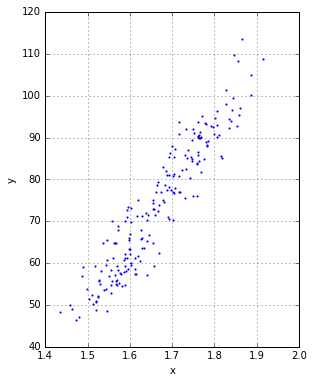

In [16]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Plot the results
# plot f(x)
fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(height, weight, marker=".", color='b', s=5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()
    
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=14.405193928041571, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.142 seconds


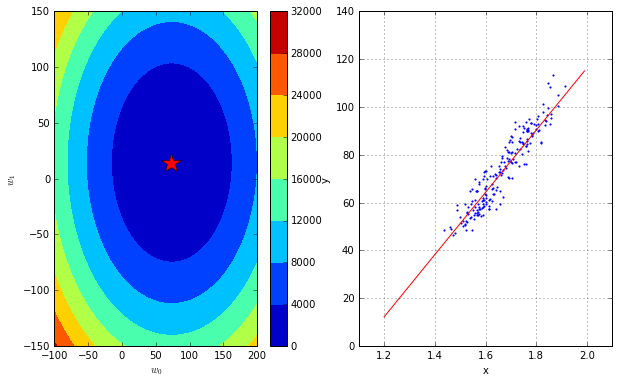

In [20]:
from grid_search import *
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [26]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

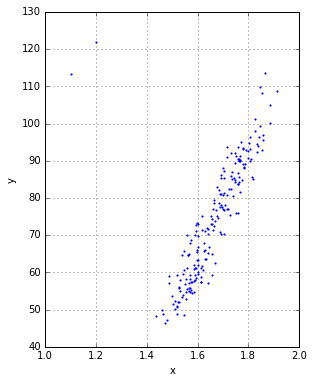

In [22]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Plot the results
# plot f(x)
fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(height, weight, marker=".", color='b', s=5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()
    
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Grid Search: loss*=66.92119404701603, w0*=72.72727272727272, w1*=10.606060606060595, execution time=0.125 seconds


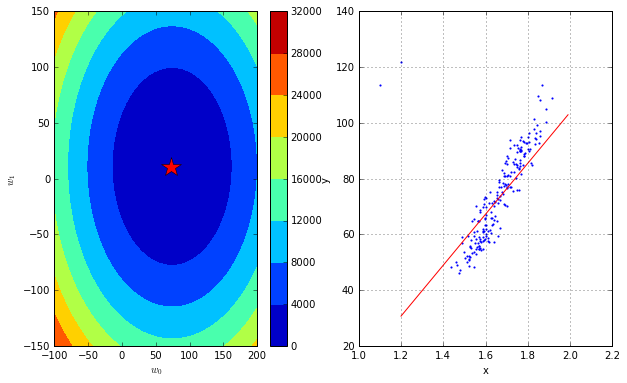

In [23]:
from grid_search import *
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [ ]:
def compute_cost(y, tx, w):
    """calculate the cost.

    you can calculate the cost by mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    
    # vector e
    e = compute_e(y, tx, w)
    N = compute_N(e)
    L_MSE = np.dot(np.matrix.transpose(e), e)
    L_MSE = L_MSE / (2 * N)
    
    return L_MSE

def compute_e(y, tx, w):
    return (y - np.dot(tx,w))

def compute_N(e):
    return e.shape[0]